<h1><center>Aspect based sentiment analysis of climate change tweets</center></h1>



# 1. Data exploration

In [1]:
import pandas as pd
import seaborn as sns

In [22]:
#Loading dataset
data= pd.read_csv('twitter_sentiment_data.csv',sep=',')

In [23]:
data.shape

(43943, 3)

In [25]:
#We drop duplicates and column tweetid
data=data.drop_duplicates(subset=['message'])
data=data.drop(columns=['tweetid'])

We clean our dataset

In [28]:

from tqdm import tqdm
import string
import re
import nltk

#delete '#' in each tweet
def remove_hashtags(tokens):
    tokens = map(lambda x: x.replace('#', ''), tokens)
    return list(tokens)

#delete http links in each tweet

def remove_url(tokens):
    tokens = filter(lambda x: "http" not in x, tokens)
    return list(tokens)

#delete html block in each tweet
def remove_html(tokens):
    tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
    return list(tokens)

#delete RT  in each tweet

def remove_retweet(tokens):
    tokens = filter(lambda x: x!= 'RT', tokens)
    return list(tokens)

def remove_special_characters(tokens):
    tokens = filter(lambda x: x!= 'â', tokens)
    return list(tokens)

def remove_special_characters2(tokens):
    tokens = filter(lambda x: x!= '¢', tokens)
    return list(tokens)

def remove_special_characters3(tokens):
    tokens = filter(lambda x: x!= 'ã', tokens)
    return list(tokens)


#delete names in each tweet
def remove_name(tokens):
    #tokens = filter(lambda x: x.startswith('@')==False , tokens)
    tokens = map(lambda x: x.replace('@', ''), tokens)

    return list(tokens)

#delete some punctuation

punctuation='‚¬¦'+string.punctuation  #Defining a list of punctuation to remove

def remove_punctuation(tokens):
    tokens = filter(lambda x: x not in punctuation, tokens)
    return list(tokens)


#delete some words from stopwords
stopword = nltk.corpus.stopwords.words('english')

def remove_word(tokens):
    tokens = filter(lambda x: x not in stopword, tokens)
    return list(tokens)





def tokenized_cleaned_tweets2(corpus):
    tokenizer = TweetTokenizer() 
    tokenized_sentences = []
    for sample in tqdm(corpus):
        pat = r'[^a-zA-z0-9.,!?/:;@#\"\'\s]' 
        sample=re.sub(pat, '', sample) #remove special characters in tweet
        sample=re.sub('[0-9]+', '', sample) #remove numbers in the tweet
        tokens = tokenizer.tokenize(sample)
        tokens = remove_url(tokens)
        tokens = remove_html(tokens)
        tokens = remove_hashtags(tokens)
        #tokens = remove_retweet(tokens)
        #tokens = remove_name(tokens)
        tokens = remove_punctuation(tokens)
        tokens = remove_word(tokens)  #removing some words
        tokens = list(map(lambda x: x.lower(), tokens))
        tokenized_sentences.append(tokens)
    return tokenized_sentences

In [29]:
cleaned_data1=tokenized_cleaned_tweets2(data.message.array)

100%|██████████| 41033/41033 [00:05<00:00, 6903.61it/s]


In [48]:
#We clean each tweet and create a new colum containing the cleaned tweet
data['cleaned_tweets']=[' '.join(cleaned_data1[i]) for i in range(len(cleaned_data1)) ]

In [31]:
data.head()

,sentiment,message,cleaned_tweets
0,-1,@tiniebeany climate change is an interesting h...,@tiniebeany climate change interesting hustle ...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,rt @natgeochannel watch beforetheflood right @...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,fabulous leonardo dicaprio's film climate chan...
3,1,RT @Mick_Fanning: Just watched this amazing do...,rt @mick_fanning just watched amazing document...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",rt @cnalive pranita biswasi lutheran odisha gi...


In the following cells, we want to create a dataframe containing for each sentiment $50$ words  with highest occurencies

In [49]:
from functools import reduce
from operator import add


In [33]:
data_pro = data.loc[data['sentiment']==1,'cleaned_tweets'].apply(lambda x: TweetTokenizer().tokenize(x)).array
data_pro_contatenated = reduce(add, data_pro)

In [34]:
data_anti = data.loc[data['sentiment']==-1,'cleaned_tweets'].apply(lambda x: TweetTokenizer().tokenize(x)).array
data_anti_contatenated = reduce(add, data_anti)

In [35]:
data_neut= data.loc[data['sentiment']==0,'cleaned_tweets'].apply(lambda x: TweetTokenizer().tokenize(x)).array
data_neut_contatenated = reduce(add, data_neut)

In [36]:
data_news= data.loc[data['sentiment']==0,'cleaned_tweets'].apply(lambda x: TweetTokenizer().tokenize(x)).array
data_news_contatenated = reduce(add, data_news)

In [37]:
from collections import Counter
c_pro = Counter(data_pro_contatenated)
c_anti = Counter(data_anti_contatenated)
c_neut = Counter(data_neut_contatenated)
c_news= Counter(data_news_contatenated)

In [38]:
def word_occurencies(dictio,nbre=50):
    words=[]
    occurencies=[]
    for word, occurence in sorted(dictio.items(),  key=lambda t: t[1],reverse=True)[:nbre] :
        words.append(word)
        occurencies.append(occurence)
    return words,occurencies 

In [39]:
c={}
#Pro
c['word_pro']=word_occurencies(c_pro,nbre=50)[0]
c['occurencies_pro']=word_occurencies(c_pro,nbre=50)[1]

#Anti
c['word_anti']=word_occurencies(c_anti,nbre=50)[0]
c['occurencies_anti']=word_occurencies(c_anti,nbre=50)[1]

#Neutral
c['word_neutral']=word_occurencies(c_neut,nbre=50)[0]
c['occurencies_neutral']=word_occurencies(c_neut,nbre=50)[1]

#News
c['word_news']=word_occurencies(c_news,nbre=50)[0]
c['occurencies_news']=word_occurencies(c_news,nbre=50)[1]

In [40]:
WO=pd.DataFrame(data=c)

Top 50 word of each sentiment

In [41]:
WO

,word_pro,occurencies_pro,word_anti,occurencies_anti,word_neutral,occurencies_neutral,word_news,occurencies_news
0,climate,17698,climate,2292,climate,4528,climate,4528
1,change,17182,change,2141,change,4428,change,4428
2,rt,12315,rt,1937,rt,3294,rt,3294
3,global,3920,global,1854,global,3115,global,3115
4,warming,3552,warming,1793,warming,3003,warming,3003
5,the,1932,the,379,i,935,i,935
6,trump,1556,i,357,...,625,...,625
7,amp,1546,...,329,the,456,the,456
8,i,1303,amp,214,trump,378,trump,378
9,real,1185,hoax,184,amp,325,amp,325


We can see that for each sentiment, the words with the highest occurencies are climate, change, warming, global. This is not surprising since the topic is about those words. We can also see that the pro and the anti climate use the same arguments to defend their position. As a matter of fact, science and belief are used for the same goal. The presence of words Obama and trump are not surprising due to their political impact and on their opposite positions on this topic. Let us generate word clouds on different sentiments in order to visualize the most common word expressions.

In [42]:
text_pro=str(data.loc[data['sentiment']==1,'cleaned_tweets'])
text_anti=str(data.loc[data['sentiment']==-1,'cleaned_tweets'])
text_neutral=str(data.loc[data['sentiment']==0,'cleaned_tweets'])
text_news=str(data.loc[data['sentiment']==2,'cleaned_tweets'])


In [43]:
!pip install wordcloud

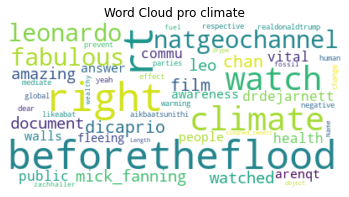

In [44]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_pro)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud pro climate")
plt.axis("off")
plt.show()

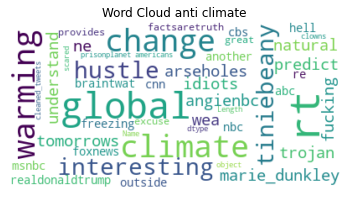

In [45]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_anti)
wordcloud1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_neutral)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud anti climate")
plt.axis("off")
plt.show()

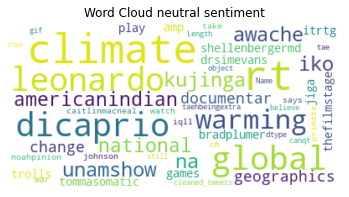

In [46]:
wordcloud= WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_neutral)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud neutral sentiment")
plt.axis("off")
plt.show()

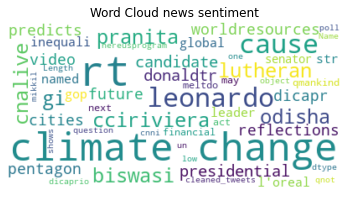

In [47]:
wordcloud= WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_news)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud news sentiment")
plt.axis("off")
plt.show()

# 2. Aspect Based Sentiment Analysis

We first clean again our tweets (by removing RT and name starting with @ but keeping words in stopword) 


In [55]:
#delete names in each tweet
def remove_name(tokens):
    tokens = filter(lambda x: x.startswith('@')==False , tokens)
    #tokens = map(lambda x: x.replace('@', ''), tokens)

    return list(tokens)


def tokenized_cleaned_tweets3(corpus):
    tokenizer = TweetTokenizer() 
    tokenized_sentences = []
    for sample in tqdm(corpus):
        pat = r'[^a-zA-z0-9.,!?/:;@#\"\'\s]' 
        sample=re.sub(pat, '', sample) #remove special characters in tweet
        sample=re.sub('[0-9]+', '', sample) #remove numbers in the tweet
        tokens = tokenizer.tokenize(sample)
        tokens = remove_url(tokens)
        tokens = remove_html(tokens)
        tokens = remove_hashtags(tokens)
        tokens = remove_retweet(tokens)
        tokens = remove_name(tokens)
        tokens = remove_punctuation(tokens)
        #tokens = remove_word(tokens)  #removing some words
        tokens = list(map(lambda x: x.lower(), tokens))
        tokenized_sentences.append(tokens)
    return tokenized_sentences


In [56]:
cleaned_data2=tokenized_cleaned_tweets3(data.message.array)

100%|██████████| 41033/41033 [00:04<00:00, 9784.30it/s] 


In [57]:
#our new cleaned tweets
data['cleaned_tweets']=[' '.join(cleaned_data2[i]) for i in range(len(cleaned_data2)) ]

In [59]:
print(data['message'][0])
print(data['cleaned_tweets'][0])

@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom
climate change is an interesting hustle as it was global warming but the planet stopped warming for yes while the suv boom


In [64]:
#We install and import some librairies
!pip install stanza -U


     |████████████████████████████████| 286kB 8.0MB/s 


In [65]:
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
#import stanfordnlp

import stanza


Now download the Stanza English model and some nltk tools that will be later used for extracting the Dependency relation in the text and other text preprocessing tasks.

In [66]:
#stanfordnlp.download('en')
stanza.download('en')       # This downloads the English models for the neural pipeline

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
#sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')


2021-04-24 10:33:09 INFO: Downloading default packages for language: en (English)...
2021-04-24 10:34:32 INFO: Finished downloading models and saved to /root/stanza_resources.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Now for each sentence in the tweet tokenize it and perform POS Tagging and store it into a Tagged List.

In [67]:
#tokenizer = TweetTokenizer()

def tweet_Postag(sentence):
  
  txt_list = nltk.word_tokenize(sentence) #tokenizer.tokenize(sentence)     # word tokenize of the sentence
  
  tagged= nltk.pos_tag(txt_list) #Pos tag of the sentence
  return tagged


In [68]:
sentence=data['cleaned_tweets'][0]
tag=tweet_Postag(sentence)
print(tag)

[('climate', 'NN'), ('change', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('interesting', 'JJ'), ('hustle', 'NN'), ('as', 'IN'), ('it', 'PRP'), ('was', 'VBD'), ('global', 'JJ'), ('warming', 'NN'), ('but', 'CC'), ('the', 'DT'), ('planet', 'NN'), ('stopped', 'VBD'), ('warming', 'VBG'), ('for', 'IN'), ('yes', 'NNS'), ('while', 'IN'), ('the', 'DT'), ('suv', 'NN'), ('boom', 'NN')]


Now there are many instances where a feature is represented by multiple words so we need to handle that first by joining multiple words features into a one-word feature.

In [69]:
def joining_word(taggedList):
  newwordList = []
  flag = 0
  for i in range(0,len(taggedList)-1):
    if (taggedList[i][1]=="NN" and taggedList[i+1][1]=="NN"):
      newwordList.append(taggedList[i][0]+taggedList[i+1][0])  #concatenate two consecutive words
      flag=1
    else:
      if (flag==1):
        flag=0
        continue
      newwordList.append(taggedList[i][0])
      if (i==len(taggedList)-2):
        newwordList.append(taggedList[i+1][0])
  finaltxt = ' '.join(word for word in newwordList)   
  return [finaltxt, newwordList]


In [75]:
txt=joining_word(tag)[0]
wordList=joining_word(tag)[1]

print(txt)
print(wordList)


climatechange is an interesting hustle as it was global warming but the planet stopped warming for yes while the suvboom
['climatechange', 'is', 'an', 'interesting', 'hustle', 'as', 'it', 'was', 'global', 'warming', 'but', 'the', 'planet', 'stopped', 'warming', 'for', 'yes', 'while', 'the', 'suvboom']


Tokenize and POS Tag the new sentence. 


In [78]:
tag1=tweet_Postag(txt)
tag1


[('climatechange', 'NN'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('interesting', 'JJ'),
 ('hustle', 'NN'),
 ('as', 'IN'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('global', 'JJ'),
 ('warming', 'NN'),
 ('but', 'CC'),
 ('the', 'DT'),
 ('planet', 'NN'),
 ('stopped', 'VBD'),
 ('warming', 'VBG'),
 ('for', 'IN'),
 ('yes', 'NNS'),
 ('while', 'IN'),
 ('the', 'DT'),
 ('suvboom', 'NN')]

Now we will use the Stanza NLP Dependency Parser to get the relations between each word.

In [79]:
nlp = stanza.Pipeline('en') # This sets up a default neural pipeline in English

2021-04-24 10:44:30 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-04-24 10:44:30 INFO: Use device: cpu
2021-04-24 10:44:30 INFO: Loading: tokenize
2021-04-24 10:44:30 INFO: Loading: pos
2021-04-24 10:44:31 INFO: Loading: lemma
2021-04-24 10:44:31 INFO: Loading: depparse
2021-04-24 10:44:32 INFO: Loading: sentiment
2021-04-24 10:44:32 INFO: Loading: ner
2021-04-24 10:44:33 INFO: Done loading processors!


In [81]:
def par_depend(finaltxt, newwordList):
  doc = nlp(finaltxt)
  dep_node = []
  for dep_edge in doc.sentences[0].dependencies:
    dep_node.append([dep_edge[2].text, dep_edge[0].id, dep_edge[1]])
  for i in range(0, len(dep_node)):
    if (int(dep_node[i][1]) != 0):
        dep_node[i][1] = newwordList[(int(dep_node[i][1]) - 1)]
  return dep_node

In [83]:
dep_node=par_depend(txt,wordList)
dep_node

[['climatechange', 'hustle', 'nsubj'],
 ['is', 'hustle', 'cop'],
 ['an', 'hustle', 'det'],
 ['interesting', 'hustle', 'amod'],
 ['hustle', 0, 'root'],
 ['as', 'warming', 'mark'],
 ['it', 'warming', 'nsubj'],
 ['was', 'warming', 'cop'],
 ['global', 'warming', 'amod'],
 ['warming', 'hustle', 'advcl'],
 ['but', 'stopped', 'cc'],
 ['the', 'planet', 'det'],
 ['planet', 'stopped', 'nsubj'],
 ['stopped', 'hustle', 'conj'],
 ['warming', 'stopped', 'xcomp'],
 ['for', 'yes', 'case'],
 ['yes', 'warming', 'obl'],
 ['while', 'suvboom', 'mark'],
 ['the', 'suvboom', 'det'],
 ['suvboom', 'warming', 'obl']]

Now we will select only those sublists from the taggedList that could probably contain the features.

In [84]:
def feat_cat_list(taggedList):
  featureList = [] #We will store some words with their tags
  categoriesList = []

  for i in taggedList:
    if(i[1]=='JJ' or i[1]=='NN' or i[1]=='JJR' or i[1]=='NNS' or i[1]=='RB'):
        featureList.append(list(i))
        categoriesList.append(i[0])
  return [featureList,categoriesList]

In [85]:
feature_list,categories_list=feat_cat_list(tag1)
print(feature_list)
print(categories_list)

[['climatechange', 'NN'], ['interesting', 'JJ'], ['hustle', 'NN'], ['global', 'JJ'], ['warming', 'NN'], ['planet', 'NN'], ['yes', 'NNS'], ['suvboom', 'NN']]
['climatechange', 'interesting', 'hustle', 'global', 'warming', 'planet', 'yes', 'suvboom']


Now using the Dependency Parser list and the feature list we will determine to which of the words these features in the feature list are related to.

In [159]:
def word_relation(featureList,dep_node):
  fcluster = []
  for i in featureList:
    filist = [] #for eah word in the feature list, we will store some words related to that word
    for j in dep_node:
        if((j[0]==i[0] or j[1]==i[0]) and (j[2] in ["nsubj", "acl:relcl", "obj", "dobj", "agent", "advmod", "amod", "neg", "prep_of", "acomp", "xcomp", "compound"])):
            if(j[0]==i[0]):
                filist.append(j[1])
    
    fcluster.append([i[0], filist])
  return fcluster


In [91]:
fcluster=word_relation(feature_list,dep_node)
fcluster

[['climatechange', ['hustle']],
 ['interesting', ['hustle']],
 ['hustle', []],
 ['global', ['warming']],
 ['warming', ['stopped']],
 ['planet', ['stopped']],
 ['yes', []],
 ['suvboom', []]]

So as you can see we have got the feature words and for each word a list of words it is related to. Now select only the feature Nouns List from the fcluster.

In [94]:
def feature_selection(featureList,fcluster):
  finalcluster = []
  dic = {}
  for i in featureList:
    dic[i[0]] = i[1]
  for i in fcluster:
    if(dic[i[0]]=="NN") and len(i[1])!=0:  #select the feature nouns and remove nouns with empty sentiment
        finalcluster.append(i)
  return finalcluster


In [95]:
final_cluster=feature_selection(feature_list,fcluster)
final_cluster

[['climatechange', ['hustle']],
 ['warming', ['stopped']],
 ['planet', ['stopped']]]

Here the aspect sentiment analysis function with many sentences

In [164]:
def aspect_sentiment_analysis(corpus):
    
    #sentList = nltk.sent_tokenize(tweet) # Splitting the tweet into sentences

    finalCluster = [] #List to store all the aspect and sentiment of all the sentences in the tweet
    

    for sent in corpus:
      tagged_list=tweet_Postag(sent) #Pos-tagging the sentence
      if len(tagged_list)>1:
        final_txt,newword_list= joining_word(tagged_list) #joigning word in the sentence
        tagged_list=tweet_Postag(final_txt) #Pos-tagging the new sentence


        dep_node1=par_depend(final_txt,newword_list)  #Getting relationship between words
        feature_list=feat_cat_list(tagged_list)[0] #create a feature list
        f_cluster=word_relation(feature_list,dep_node1) #creating a relation between words in the feature list
        final_cluster=feature_selection(feature_list,f_cluster) #selecting aspect and sentiment
      else:
        final_cluster=[]


      finalCluster.append(final_cluster)
      
    return finalCluster


## We evaluate our aspect based sentiment analysis 

### Let us look at the outpout for the first 10 pro climate tweets

In [121]:

corpus=data.loc[data['sentiment']==1,'cleaned_tweets'][0:10]
aspect_sent_pro=aspect_sentiment_analysis(corpus)


In [130]:
tweets_pro=data.loc[data['sentiment']==1,'cleaned_tweets'][0:10]
dict_pro={'message_pro':tweets_pro,'aspect_sentiment':aspect_sent_pro}
df_pro=pd.DataFrame(data=dict_pro)
df_pro=df_pro.reset_index(drop=True)

In [131]:
df_pro.head(3)

,message_pro,aspect_sentiment
0,watch beforetheflood right here as travels the...,"[[world, [travels]], [climatechange, [tackle]]]"
1,fabulous leonardo dicaprio's film on climate c...,"[[film, [brilliant]]]"
2,just watched this amazing documentary by leona...,"[[documentary, [watched]]]"


In [139]:
for i in range(3):
  print(i,'message_pro:',df_pro['message_pro'][i])
  print('aspect_sentiment:', df_pro['aspect_sentiment'][i])



0 message_pro: watch beforetheflood right here as travels the world to tackle climate change htt
aspect_sentiment: [['world', ['travels']], ['climatechange', ['tackle']]]
1 message_pro: fabulous leonardo dicaprio's film on climate change is brilliant do watch via
aspect_sentiment: [['film', ['brilliant']]]
2 message_pro: just watched this amazing documentary by leonardodicaprio on climate change we all think this
aspect_sentiment: [['documentary', ['watched']]]


From these few examples, we can conclude that our aspect-based sentiment analysis capture a bit the spirit of the pro climate tweets 

### Let us look at the outpout for the first 10 anti climate tweets

In [165]:
corpus=data.loc[data['sentiment']==-1,'cleaned_tweets'][0:10]
aspect_sent_anti=aspect_sentiment_analysis(corpus)


In [166]:
tweets=data.loc[data['sentiment']==-1,'cleaned_tweets'][0:10]
dict1={'message_anti':tweets,'aspect_sentiment':aspect_sent_anti}
df=pd.DataFrame(data=dict1)
df_anti=df.reset_index(drop=True)

In [143]:
for i in range(3):
  print(i,'message_anti:',df_anti['message_anti'][i])
  print('aspect_sentiment:', df_anti['aspect_sentiment'][i])


0 message_anti: climate change is an interesting hustle as it was global warming but the planet stopped warming for yes while the suv boom
aspect_sentiment: [['climatechange', ['hustle']], ['warming', ['stopped']], ['planet', ['stopped']]]
1 message_anti: arseholes couldn't predict tomorrows weather in a month heat wave yet we trust them on climate change narrr
aspect_sentiment: [['monthheat', ['wave']], ['climatechange', ['changenarrr']]]
2 message_anti: you do understand that climate change is natural not necessarily caused by humans it snowed in miami and the atlantic froze
aspect_sentiment: [['climatechange', ['natural']]]


From these few examples, we can conclude that our aspect-based sentiment analysis does not capture very well the anti climate tweets 

### Let us look at the outpout for the first 10 neutral climate tweets

In [144]:
corpus=data.loc[data['sentiment']==0,'cleaned_tweets'][0:10]
aspect_sent_neut=aspect_sentiment_analysis(corpus)


In [146]:
tweets=data.loc[data['sentiment']==0,'cleaned_tweets'][0:10]
dict1={'message_neutral':tweets,'aspect_sentiment':aspect_sent_neut}
df=pd.DataFrame(data=dict1)
df_neut=df.reset_index(drop=True)

for i in range(3):
  print(i,'message_neutral:',df_neut['message_neutral'][i])
  print('aspect_sentiment:', df_neut['aspect_sentiment'][i])


0 message_neutral: unamshow awache kujinga na iko global warming
aspect_sentiment: [['iko', ['warming']]]
1 message_neutral: leonardo dicaprio's climate change documentary is free for a week indigenous tairp
aspect_sentiment: [['climatechange', ['changedocumentary']], ['changedocumentary', ['free']], ['week', ['tairp']]]
2 message_neutral: national geographics climate change documentary with leonardo dicaprio is now on youtube via
aspect_sentiment: []


From these few examples, we can conclude that our aspect-based sentiment analysis does not capture at all neutral climate tweets 

### Let us look at the outpout for the first 10 news climate tweets

In [147]:
corpus=data.loc[data['sentiment']==2,'cleaned_tweets'][0:10]
aspect_sent_news=aspect_sentiment_analysis(corpus)


In [148]:
tweets=data.loc[data['sentiment']==2,'cleaned_tweets'][0:10]
dict1={'message_news':tweets,'aspect_sentiment':aspect_sent_news}
df=pd.DataFrame(data=dict1)
df_news=df.reset_index(drop=True)

for i in range(3):
  print(i,'message_news:',df_news['message_news'][i])
  print('aspect_sentiment:', df_news['aspect_sentiment'][i])


0 message_news: pranita biswasi a lutheran from odisha gives testimony on effects of climate change amp natural disasters on the po
aspect_sentiment: [['biswasi', ['gives']], ['lutheran', ['gives']], ['testimony', ['gives']], ['climatechange', ['amp']]]
1 message_news: presidential candidate donaldtrump is dangerous on climate change says monaco s prince albert
aspect_sentiment: [['candidatedonaldtrump', ['dangerous']], ['sprince', ['princealbert']], ['princealbert', ['says']]]
2 message_news: reflections on leonardo dicaprios new climate change film beforetheflood
aspect_sentiment: [['climatechange', ['filmbeforetheflood']], ['changefilm', ['filmbeforetheflood']], ['filmbeforetheflood', ['dicaprios']]]


From these few examples, we can conclude that our aspect-based sentiment analysis does capture very well  climate tweets on news 

To conclude our  aspect-based sentiment analysis is not good in general. This could be due partly to the ambiguity of tweets, the quality of tweets and their cleaning. Another reason could be the fact that we did not fixed the aspects and sentiments that we want to look for or the fact that our relationships functions need some improvements. We lacked time to tackle these issues and we leave it as a future work. 